**Q1**

In [ ]:
import pandas as pd
import numpy as np
from math import sqrt
# https://docs.python.org/3/library/math.html
from datetime import datetime
# https://docs.python.org/3/library/datetime.html

from matplotlib import pyplot as plt

import seaborn as sns
from sklearn.metrics import mean_squared_error
# https://scikit-learn.org/stable/getting_started.html

from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA, ARMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
# https://www.statsmodels.org/stable/index.html

from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/nrjcs/iitpbse/master/daily-total-female-births.csv')
data

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
...,...,...
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55


In [ ]:
data.head()

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


**Q2**

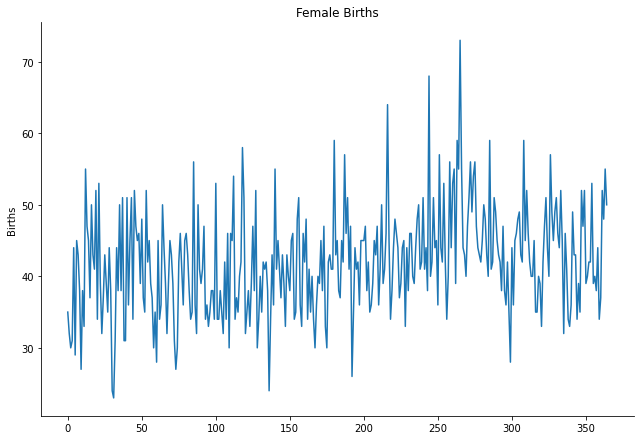

In [ ]:
#Sunspots PLOT
data.plot(figsize=(9,6))
plt.ylabel('Births')
plt.legend().set_visible(False)
plt.tight_layout()
plt.title('Female Births')
sns.despine(top=True)
plt.show()

Q3

In [ ]:
con=data['Date']
data['Date']=pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
#check datatype of index
data.index

DatetimeIndex(['1959-01-01', '1959-01-02', '1959-01-03', '1959-01-04',
               '1959-01-05', '1959-01-06', '1959-01-07', '1959-01-08',
               '1959-01-09', '1959-01-10',
               ...
               '1959-12-22', '1959-12-23', '1959-12-24', '1959-12-25',
               '1959-12-26', '1959-12-27', '1959-12-28', '1959-12-29',
               '1959-12-30', '1959-12-31'],
              dtype='datetime64[ns]', name='Date', length=365, freq=None)

In [ ]:
#convert to time series:
ts = data['Births']
ts.head(10)

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
Name: Births, dtype: int64

In [ ]:
#Q4
data.loc['1959-01-01']

Births    35
Name: 1959-01-01 00:00:00, dtype: int64

In [ ]:
data.loc['1959-12-28']

Births    52
Name: 1959-12-28 00:00:00, dtype: int64

In [ ]:
data.loc['1959-02-01']

Births    23
Name: 1959-02-01 00:00:00, dtype: int64

**Q5 & Q6**

In [ ]:
daily_arr = []
month_arr = []
month = 'Jan'
indexCol = []
for i in range(len(data['Births'])):
  month_arr.append(month)
  indexCol.append(i+1)
  if((i+1)%31>0):
    daily_arr.append((i+1)%31)
  else:
    daily_arr.append(12)
    month = month + month

In [ ]:
data['daily_num'] = daily_arr
data['month_num'] = month_arr
data['indexCol'] = indexCol

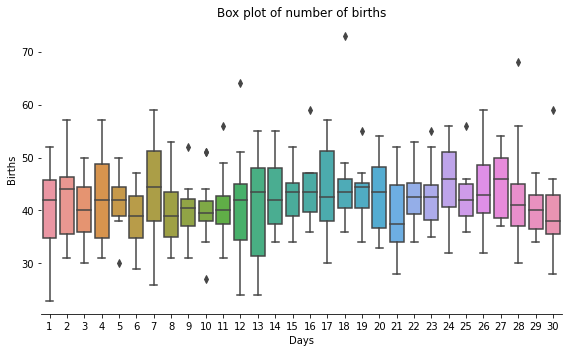

In [ ]:
#Box plot 
plt.figure(figsize=(8,5))
sns.boxplot(x="daily_num", y="Births", data=data)
plt.xlabel('Days')
plt.title('Box plot of number of births')
sns.despine(left=True)
plt.tight_layout()
#plt.savefig('BoxPlot_Passengers_yearly.pdf', dpi=1400)
plt.show()

Q7

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Kurtosis of normal distribution: 0.7505219603273874
Skewness of normal distribution: 0.44554790047635295


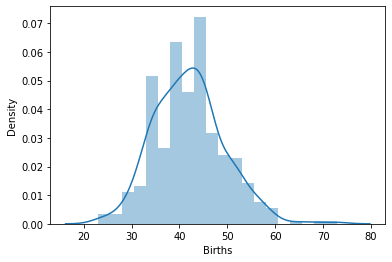

In [ ]:
sns.distplot(data['Births']);
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(data['Births'])))
print( 'Skewness of normal distribution: {}'.format(stats.skew(data['Births'])))

In [ ]:
number_of_test = 24

no_of_train = len(data['Births'])-number_of_test
indexCol = []
for k in range(no_of_train):
    indexCol.append(k+1)
df_train = pd.DataFrame()
df_train['indexCol'] = indexCol
df_train['W'] = data['Births'][:no_of_train]
indexCol = []
data_test= []
for k in range(number_of_test):
    indexCol.append(k+1)
    data_test.append(data['Births'][no_of_train+k])
df_test = pd.DataFrame()
df_test['indexCol'] = indexCol
df_test['W'] = data_test

In [ ]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

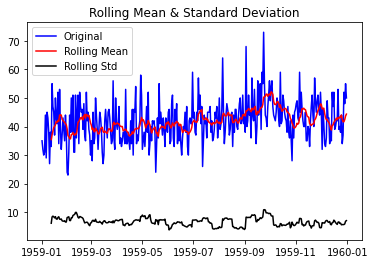

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


In [ ]:
test_stationarity(data['Births'])

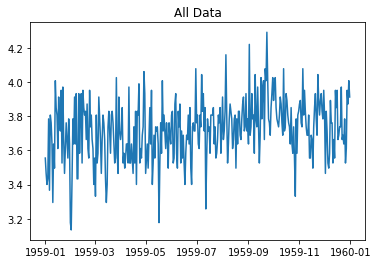

In [ ]:
all_data_log = np.log(data['Births'])
train_log = np.log(df_train['W'])
test_log = np.log(df_test['W'])
plt.plot(all_data_log)
plt.title("All Data")
plt.show()

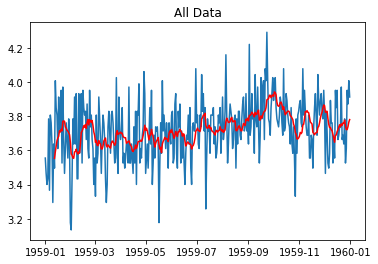

In [ ]:
moving_avg = all_data_log.rolling(window=12).mean()
plt.plot(all_data_log)
plt.title("All Data")
plt.plot(moving_avg,color='red')
plt.show()

In [ ]:
ts_log_moving_avg_diff = all_data_log - moving_avg
print(ts_log_moving_avg_diff)
ts_log_moving_avg_diff.head(24)

Date
1959-01-01         NaN
1959-01-02         NaN
1959-01-03         NaN
1959-01-04         NaN
1959-01-05         NaN
                ...   
1959-12-27   -0.110816
1959-12-28    0.229509
1959-12-29    0.132163
1959-12-30    0.241758
1959-12-31    0.131918
Name: Births, Length: 365, dtype: float64


Date
1959-01-01         NaN
1959-01-02         NaN
1959-01-03         NaN
1959-01-04         NaN
1959-01-05         NaN
1959-01-06         NaN
1959-01-07         NaN
1959-01-08         NaN
1959-01-09         NaN
1959-01-10         NaN
1959-01-11         NaN
1959-01-12   -0.057087
1959-01-13    0.416073
1959-01-14    0.226853
1959-01-15    0.149580
1959-01-16   -0.060909
1959-01-17    0.229543
1959-01-18    0.045895
1959-01-19    0.006024
1959-01-20    0.227859
1959-01-21   -0.187755
1959-01-22    0.199971
1959-01-23   -0.108923
1959-01-24   -0.304185
Name: Births, dtype: float64

In [ ]:
# remove all NaN fields
ts_log_moving_avg_diff.dropna(inplace = True)
ts_log_moving_avg_diff.head()

Date
1959-01-12   -0.057087
1959-01-13    0.416073
1959-01-14    0.226853
1959-01-15    0.149580
1959-01-16   -0.060909
Name: Births, dtype: float64

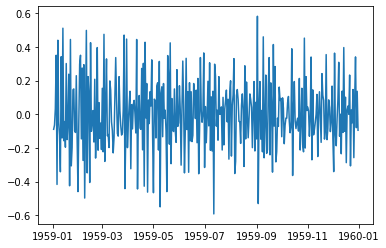

In [ ]:
#Differencing of logarithm of data
ts_log_diff = all_data_log - all_data_log.shift()
plt.plot(ts_log_diff)

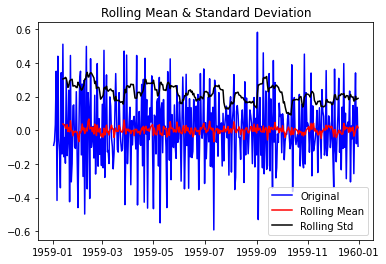

Results of Dickey-Fuller Test:
Test Statistic                -1.296334e+01
p-value                        3.191205e-24
#Lags Used                     6.000000e+00
Number of Observations Used    3.570000e+02
Critical Value (1%)           -3.448801e+00
Critical Value (5%)           -2.869670e+00
Critical Value (10%)          -2.571101e+00
dtype: float64


In [ ]:
#remove Nan from obtained differenced series 
# and plot the original versus rolling mean verss rolling standard deviation
ts_log_diff.dropna(inplace = True)
test_stationarity(ts_log_diff)

Q8 & Q9

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from pandas import Series
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from math import sqrt
from numpy import mean
from pandas import DataFrame
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
import pandas as pd
import statsmodels
import numpy as np
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot as plt
import statsmodels.api
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.pyplot import figure
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.arima_model import ARMA

from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
from datetime import datetime

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/nrjcs/iitpbse/master/daily-total-female-births.csv', header=0, index_col=0)

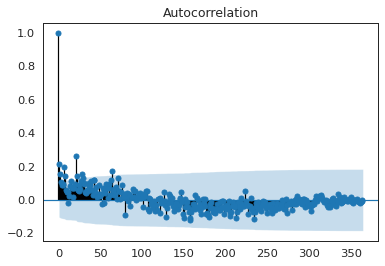

In [ ]:
plot_acf(data, lags=len(data)-1)
plt.show()

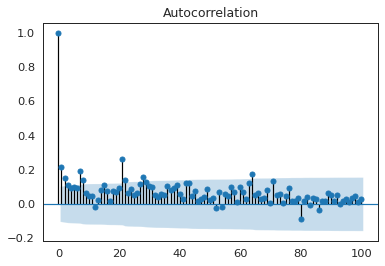

In [ ]:
plot_acf(data, lags=100)
plt.show()

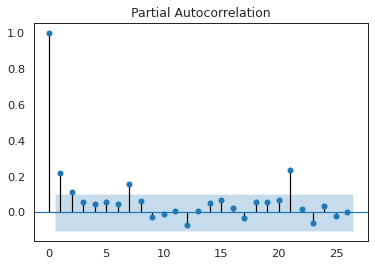

In [ ]:
plot_pacf(data, lags=26)
pyplot.show()

In [ ]:
# divide the differenced series into train and test
df_train['W_diff'] = ts_log_diff[0:no_of_train]
df_test['W_diff'] = ts_log_diff[no_of_train:]
data['W_diff'] = ts_log_diff

In [ ]:
data['W_diff'] = ts_log_diff
data['W_diff'].dropna(inplace=True)
normalized = data['W_diff'].values
normalized1d=[]
for i in range(1,len(normalized)):
    normalized1d.append(normalized[i])

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


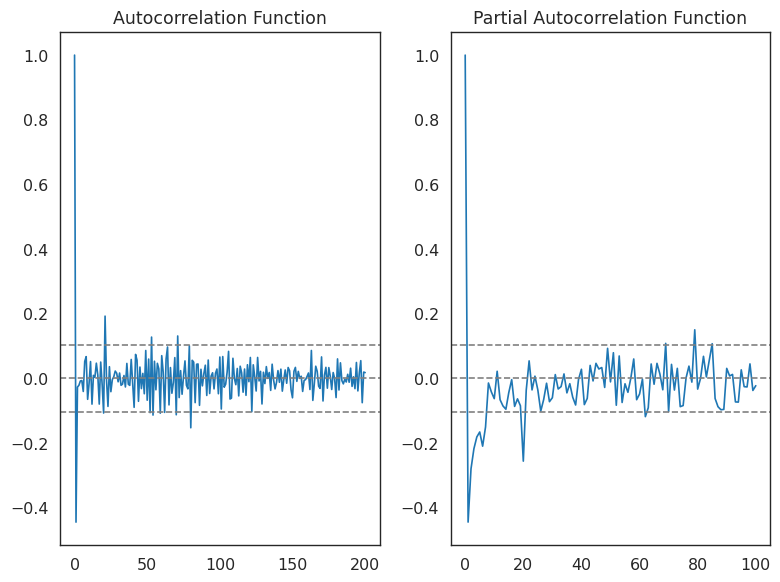

In [ ]:
#ACF and  PACF plots of differenced series
plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')


lag_acf = acf(ts_log_diff, nlags = 200)
lag_pacf = pacf(ts_log_diff, nlags = 100, method = 'ols')

#plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

#plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [ ]:
#AR


from statsmodels.tsa.arima_model import ARIMA as ARIMAResults

size = int(len(ts_log_diff) - 30)
train, test = ts_log_diff[0:size], ts_log_diff[size:len(ts_log_diff)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit(disp=-1, maxlag=30, method='css', trend='nc')
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

In [ ]:
temp = []
for i in range(len(predictions)):
    temp.append(predictions[i][0])
predictions_inverse = np.exp(np.array(temp))
start_test_no = len(all_data_log) - len(predictions_inverse) - 1
inversed_test = np.array(np.exp(all_data_log[start_test_no+1:]))
inversed_pred = np.array(np.exp(all_data_log[start_test_no:len(all_data_log)-1])+ predictions_inverse)

In [ ]:
for k in range(len(inversed_test)):
    print('counter=%f, predicted=%f, expected=%f' % (k+1, inversed_pred[k], inversed_test[k]))

error = sqrt(mean_squared_error(inversed_test, inversed_pred))
print('Test RMSE: %.3f' % error)

counter=1.000000, predicted=46.052560, expected=32.000000
counter=2.000000, predicted=32.994565, expected=46.000000
counter=3.000000, predicted=46.806910, expected=41.000000
counter=4.000000, predicted=42.000680, expected=34.000000
counter=5.000000, predicted=35.120412, expected=33.000000
counter=6.000000, predicted=33.865290, expected=36.000000
counter=7.000000, predicted=36.904837, expected=49.000000
counter=8.000000, predicted=50.043641, expected=43.000000
counter=9.000000, predicted=44.196565, expected=43.000000
counter=10.000000, predicted=44.091132, expected=34.000000
counter=11.000000, predicted=34.927664, expected=39.000000
counter=12.000000, predicted=39.902142, expected=35.000000
counter=13.000000, predicted=35.948149, expected=52.000000
counter=14.000000, predicted=53.035451, expected=47.000000
counter=15.000000, predicted=48.140514, expected=52.000000
counter=16.000000, predicted=53.155839, expected=39.000000
counter=17.000000, predicted=39.985663, expected=40.000000
counte

Text(0, 0.5, 'Births')

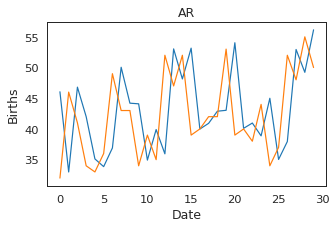

In [ ]:
# Plot the curves
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5,3)

plt.plot(inversed_pred)
plt.plot(inversed_test)

axarr.set_title('AR')
plt.xlabel('Date')
plt.ylabel('Births')

In [ ]:
MAPE = np.mean(np.abs((inversed_test - inversed_pred) / inversed_test)) * 100
print('MAPE %',MAPE)

MAPE % 16.23922736607907


In [ ]:
#MA

size = int(len(ts_log_diff) - 24)
train, test = ts_log_diff[0:size], ts_log_diff[size:len(ts_log_diff)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(2,0,2))
    model_fit = model.fit(disp=0, maxlag=50, method='css', trend='nc')
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

In [ ]:
temp = []
for i in range(len(predictions)):
    temp.append(predictions[i])
predictions_inverse = np.exp(np.array(temp))
start_test_no = len(all_data_log) - len(predictions_inverse) - 1
inverse_test = np.array(np.exp(all_data_log[start_test_no+1:]))

inverse_pred = np.array(np.exp(all_data_log[start_test_no:len(all_data_log)-1])+ predictions_inverse.flatten())

for k in range(len(inversed_test)):
    print('counter=%f, predicted=%f, expected=%f' % (k+1, inversed_pred[k], inversed_test[k]))

error = sqrt(mean_squared_error(inversed_test, inversed_pred))
print('Test RMSE: %.3f' % error)

counter=1.000000, predicted=46.052560, expected=32.000000
counter=2.000000, predicted=32.994565, expected=46.000000
counter=3.000000, predicted=46.806910, expected=41.000000
counter=4.000000, predicted=42.000680, expected=34.000000
counter=5.000000, predicted=35.120412, expected=33.000000
counter=6.000000, predicted=33.865290, expected=36.000000
counter=7.000000, predicted=36.904837, expected=49.000000
counter=8.000000, predicted=50.043641, expected=43.000000
counter=9.000000, predicted=44.196565, expected=43.000000
counter=10.000000, predicted=44.091132, expected=34.000000
counter=11.000000, predicted=34.927664, expected=39.000000
counter=12.000000, predicted=39.902142, expected=35.000000
counter=13.000000, predicted=35.948149, expected=52.000000
counter=14.000000, predicted=53.035451, expected=47.000000
counter=15.000000, predicted=48.140514, expected=52.000000
counter=16.000000, predicted=53.155839, expected=39.000000
counter=17.000000, predicted=39.985663, expected=40.000000
counte

Text(0, 0.5, 'Births')

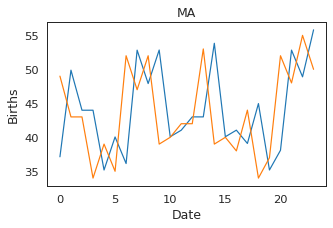

In [ ]:
# Plot the curves
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5, 3)

plt.plot(inverse_pred)
plt.plot(inverse_test)

axarr.set_title('MA')
plt.xlabel('Date')
plt.ylabel('Births')

In [ ]:
MAPE = np.mean(np.abs((inversed_test - inversed_pred) / inversed_test)) * 100
print('MAPE %' ,MAPE)

MAPE % 16.23922736607907


In [ ]:
# ARMA 
size = int(len(ts_log_diff) - 24)
train, test = ts_log_diff[0:size], ts_log_diff[size:len(ts_log_diff)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARMA(history, order=(2,0,2))
    model_fit = model.fit(disp=0, maxlag=50, method='css', trend='nc')
    output = model_fit.predict(len(history),len(history))
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

In [ ]:
temp = []
for i in range(len(predictions)):
    temp.append(predictions[i])
predictions_inverse = np.exp(np.array(temp))
start_test_no = len(all_data_log) - len(predictions_inverse) - 1
inverse_test = np.array(np.exp(all_data_log[start_test_no+1:]))
inverse_pred = np.array(np.exp(all_data_log[start_test_no:len(all_data_log)-1])+ predictions_inverse)

In [ ]:
for k in range(len(inverse_test)):
    print('counter=%f, predicted=%f, expected=%f' % (k+1, inverse_pred[k], inverse_test[k]))

error = sqrt(mean_squared_error(inverse_test, inverse_pred))
print('Test RMSE: %.3f' % error)

counter=1.000000, predicted=36.959346, expected=49.000000
counter=2.000000, predicted=49.815683, expected=43.000000
counter=3.000000, predicted=43.984063, expected=43.000000
counter=4.000000, predicted=44.039345, expected=34.000000
counter=5.000000, predicted=35.144263, expected=39.000000
counter=6.000000, predicted=39.990059, expected=35.000000
counter=7.000000, predicted=36.022389, expected=52.000000
counter=8.000000, predicted=52.821550, expected=47.000000
counter=9.000000, predicted=47.945290, expected=52.000000
counter=10.000000, predicted=52.971323, expected=39.000000
counter=11.000000, predicted=40.145985, expected=40.000000
counter=12.000000, predicted=41.069237, expected=42.000000
counter=13.000000, predicted=42.965591, expected=42.000000
counter=14.000000, predicted=42.986313, expected=53.000000
counter=15.000000, predicted=53.875723, expected=39.000000
counter=16.000000, predicted=40.116382, expected=40.000000
counter=17.000000, predicted=41.075169, expected=38.000000
counte

Text(0, 0.5, 'Births')

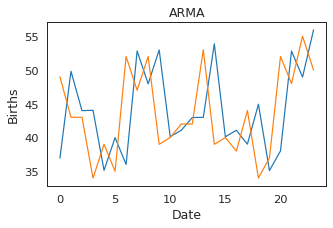

In [ ]:
# Plot the curves
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5, 3)

plt.plot(inverse_pred)
plt.plot(inverse_test)

axarr.set_title('ARMA')
plt.xlabel('Date')
plt.ylabel('Births')

In [ ]:
MAPE = np.mean(np.abs((inversed_test - inversed_pred) / inversed_test)) * 100
print('MAPE %' ,MAPE)

MAPE % 16.23922736607907


In [ ]:
#ARIMA
size = int(len(ts_log_diff) - 24)
train, test = ts_log_diff[0:size], ts_log_diff[size:len(ts_log_diff)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(2,0,2))
    model_fit = model.fit(disp=0, maxlag=30, method='css', trend='nc')
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

In [ ]:
temp = []
for i in range(len(predictions)):
    temp.append(predictions[i])
predictions_inverse = np.exp(np.array(temp))
start_test_no = len(all_data_log) - len(predictions_inverse) - 1
inverse_test = np.array(np.exp(all_data_log[start_test_no+1:]))
inverse_pred = np.array(np.exp(all_data_log[start_test_no:len(all_data_log)-1])+ predictions_inverse.flatten())

In [ ]:
for k in range(len(inverse_test)):
    print('counter=%f, predicted=%f, expected=%f' % (k+1, inverse_pred[k], inverse_test[k]))

error = sqrt(mean_squared_error(inverse_test, inverse_pred))
print('Test RMSE: %.3f' % error)

counter=1.000000, predicted=37.131855, expected=49.000000
counter=2.000000, predicted=49.877099, expected=43.000000
counter=3.000000, predicted=43.984045, expected=43.000000
counter=4.000000, predicted=43.985181, expected=34.000000
counter=5.000000, predicted=35.190010, expected=39.000000
counter=6.000000, predicted=40.050582, expected=35.000000
counter=7.000000, predicted=36.141113, expected=52.000000
counter=8.000000, predicted=52.821439, expected=47.000000
counter=9.000000, predicted=47.908925, expected=52.000000
counter=10.000000, predicted=52.842385, expected=39.000000
counter=11.000000, predicted=40.079503, expected=40.000000
counter=12.000000, predicted=41.044904, expected=42.000000
counter=13.000000, predicted=43.005431, expected=42.000000
counter=14.000000, predicted=43.003099, expected=53.000000
counter=15.000000, predicted=53.833441, expected=39.000000
counter=16.000000, predicted=40.082782, expected=40.000000
counter=17.000000, predicted=41.050195, expected=38.000000
counte

Text(0, 0.5, 'Births')

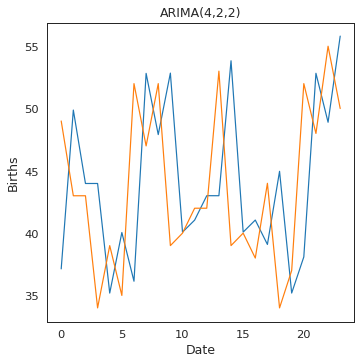

In [ ]:
# Plot the curves
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)

plt.plot(inverse_pred)
plt.plot(inverse_test)
axarr.set_title('ARIMA(4,2,2)')
plt.xlabel('Date')
plt.ylabel('Births')

In [ ]:
MAPE = np.mean(np.abs((inversed_test - inversed_pred) / inversed_test)) * 100
print('MAPE %' ,MAPE)

MAPE % 16.23922736607907


Q10

In [ ]:
import pandas as pd
# https://pandas.pydata.org/docs/

import numpy as np
# https://numpy.org/doc/stable/about.html

from math import sqrt
# https://docs.python.org/3/library/math.html
from datetime import datetime
# https://docs.python.org/3/library/datetime.html

from matplotlib import pyplot as plt
# https://matplotlib.org/index.html
import seaborn as sns
# https://seaborn.pydata.org/

from sklearn.metrics import mean_squared_error
# https://scikit-learn.org/stable/getting_started.html

from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA, ARMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
# https://www.statsmodels.org/stable/index.html

from scipy import stats
# https://docs.scipy.org/doc/scipy/reference/

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/nrjcs/iitpbse/master/daily-total-female-births.csv')

In [ ]:
data.dtypes

Date      object
Births     int64
dtype: object

In [ ]:
data.index

RangeIndex(start=0, stop=365, step=1)

In [ ]:
number_of_test = int(len(data) * 0.2)
no_of_train = len(data['Births'])-number_of_test
indexCol = []
for k in range(no_of_train):
    indexCol.append(k+1)
df_train = pd.DataFrame()
df_train['indexCol'] = indexCol
df_train['W'] = data['Births'][:no_of_train]
indexCol = []
data_test= []
for k in range(number_of_test):
    indexCol.append(k+1)
    data_test.append(data['Births'][no_of_train+k])
df_test = pd.DataFrame()
df_test['indexCol'] = indexCol
df_test['W'] = data_test

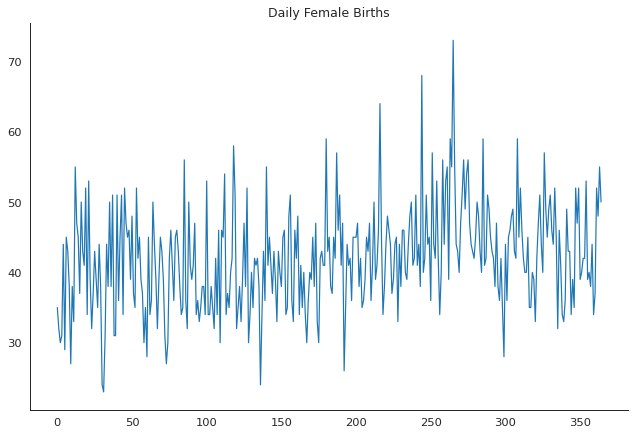

In [ ]:
#Daily Birth PLOT
data['Births'][0:2000].plot(figsize=(9,6))
plt.legend().set_visible(False)
plt.tight_layout()
plt.title('Daily Female Births')
sns.despine(top=True)
plt.show()

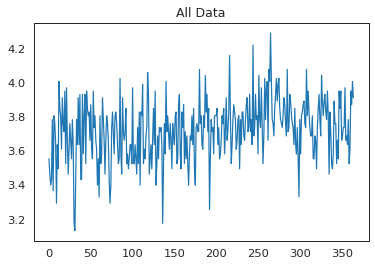

In [ ]:
all_data_log = np.log(data['Births'])
train_log = np.log(df_train['W'])
test_log = np.log(df_test['W'])
plt.plot(all_data_log)
plt.title("All Data")
plt.show()

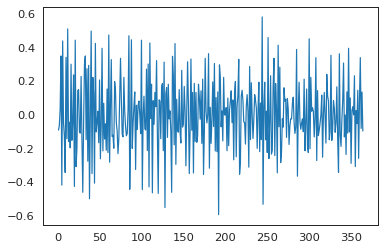

In [ ]:
#Differencing of logarithm of data
ts_log_diff = all_data_log - all_data_log.shift()
plt.plot(ts_log_diff)

In [ ]:
# remove all NaN fields
ts_log_diff.dropna(inplace = True)
ts_log_diff.head()

1   -0.089612
2   -0.064539
3    0.032790
4    0.350202
5   -0.416894
Name: Births, dtype: float64

In [ ]:
# Optimize ARIMA parameters
aicVal=[]
for d in range(1,5):
    for ari in range(0, 5):
        for maj in range(0,5):
            try:
                arima_obj = ARIMA(ts_log_diff, order=(ari,d,maj))
                arima_obj_fit=arima_obj.fit(maxlag=30, method='css', trend='nc')  
                if(len(aicVal)==0):
                    aicVal.append([ari, d, maj, arima_obj_fit.aic])
                elif(aicVal[len(aicVal)-1][3]>arima_obj_fit.aic):
                    aicVal.append([ari, d, maj, arima_obj_fit.aic])
                
                print(ari, d, maj, arima_obj_fit.aic)
            except ValueError:
                pass

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was pro

0 1 1 -63.78949439458262
1 1 0 115.60720152645933
2 1 0 29.472683903189875


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was pro

3 1 0 -23.842754439528903
4 1 0 -57.99047666160595
4 1 1 -174.75016129119632


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was pro

0 2 1 311.60877440154695
1 2 0 454.2844395330162
2 2 0 306.9927007206316


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was pro

3 2 0 210.99821052881015
4 2 0 141.0743240145915


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was pro

In [ ]:
#ARIMA
listLen=len(aicVal)
ar=int(aicVal[listLen-1][0])
d=int(aicVal[listLen-1][1])
ma=int(aicVal[listLen-1][2])
aic=int(aicVal[listLen-1][3])
print("smallest aic val=%f, ar=%f, d=%f, ma=%f " %(aic, ar, d, ma))

from statsmodels.tsa.arima_model import ARIMA as ARIMAResults

size = int(len(ts_log_diff) - number_of_test)
train, test = ts_log_diff[0:size], ts_log_diff[size:len(ts_log_diff)]
test = test.reset_index(drop = True)
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(2,0,1))
    model_fit = model.fit(disp=0, maxlag=30, method='css', trend='nc')
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    print("Iteration :",str(t+1))
    history.append(obs)

smallest aic val=-174.000000, ar=4.000000, d=1.000000, ma=1.000000 
Iteration : 1
Iteration : 2
Iteration : 3
Iteration : 4
Iteration : 5
Iteration : 6
Iteration : 7
Iteration : 8
Iteration : 9
Iteration : 10
Iteration : 11
Iteration : 12
Iteration : 13
Iteration : 14
Iteration : 15
Iteration : 16
Iteration : 17
Iteration : 18
Iteration : 19
Iteration : 20
Iteration : 21
Iteration : 22
Iteration : 23
Iteration : 24
Iteration : 25
Iteration : 26
Iteration : 27
Iteration : 28
Iteration : 29
Iteration : 30
Iteration : 31
Iteration : 32
Iteration : 33
Iteration : 34
Iteration : 35
Iteration : 36
Iteration : 37
Iteration : 38
Iteration : 39
Iteration : 40
Iteration : 41
Iteration : 42
Iteration : 43
Iteration : 44
Iteration : 45
Iteration : 46
Iteration : 47
Iteration : 48
Iteration : 49
Iteration : 50
Iteration : 51
Iteration : 52
Iteration : 53
Iteration : 54
Iteration : 55
Iteration : 56
Iteration : 57
Iteration : 58
Iteration : 59
Iteration : 60
Iteration : 61
Iteration : 62
Iteration :

In [ ]:
temp = []
for i in range(len(predictions)):
    temp.append(predictions[i])
predictions_inverse = np.exp(np.array(temp))
start_test_no = len(all_data_log) - len(predictions_inverse) - 1
inverse_test = np.array(np.exp(all_data_log[start_test_no+1:]))
inverse_pred = np.array(np.exp(all_data_log[start_test_no:len(all_data_log)-1])+ predictions_inverse.flatten())

for k in range(len(inverse_test)):
    print('counter=%f, predicted=%f, expected=%f' % (k+1, inverse_pred[k], inverse_test[k]))

error = sqrt(mean_squared_error(inverse_test, inverse_pred))
print('Test RMSE: %.3f' % error)

counter=1.000000, predicted=44.074100, expected=42.000000
counter=2.000000, predicted=43.089046, expected=38.000000
counter=3.000000, predicted=39.172914, expected=47.000000
counter=4.000000, predicted=47.973771, expected=38.000000
counter=5.000000, predicted=39.155451, expected=36.000000
counter=6.000000, predicted=37.195655, expected=42.000000
counter=7.000000, predicted=43.037548, expected=35.000000
counter=8.000000, predicted=36.192806, expected=28.000000
counter=9.000000, predicted=29.399690, expected=44.000000
counter=10.000000, predicted=44.945833, expected=36.000000
counter=11.000000, predicted=37.103954, expected=45.000000
counter=12.000000, predicted=45.917319, expected=46.000000
counter=13.000000, predicted=46.907239, expected=48.000000
counter=14.000000, predicted=48.886710, expected=49.000000
counter=15.000000, predicted=49.883253, expected=43.000000
counter=16.000000, predicted=43.993159, expected=42.000000
counter=17.000000, predicted=43.014313, expected=59.000000
counte

Text(0, 0.5, 'Births')

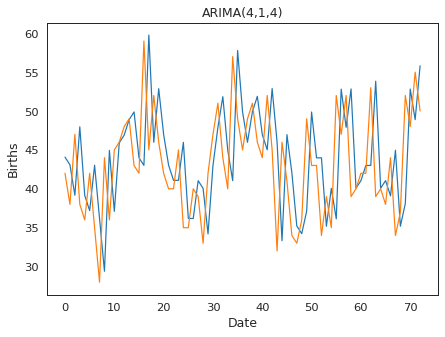

In [ ]:
# Plot the curves
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(7, 5)

plt.plot(inverse_pred)
plt.plot(inverse_test)
axarr.set_title('ARIMA(4,1,4)')
plt.xlabel('Date')
plt.ylabel('Births')

In [ ]:
MAPE = np.mean(np.abs((inversed_test - inversed_pred) / inversed_test)) * 100
print('MAPE %' ,MAPE)

MAPE % 16.23922736607907


Q12

In [ ]:
from fbprophet import Prophet
# https://facebook.github.io/prophet/docs/quick_start.html

import pandas as pd
from pandas import DataFrame

import numpy as np
# https://numpy.org/doc/stable/about.html

from math import sqrt
# https://docs.python.org/3/library/math.html
from datetime import datetime
# https://docs.python.org/3/library/datetime.html
from pandas import to_datetime
from matplotlib import pyplot as plt
# https://matplotlib.org/index.html
import seaborn as sns
# https://seaborn.pydata.org/

from sklearn.metrics import mean_squared_error
# https://scikit-learn.org/stable/getting_started.html


from scipy import stats
# https://docs.scipy.org/doc/scipy/reference/

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/nrjcs/iitpbse/master/daily-total-female-births.csv')

In [ ]:
data.dtypes

Date      object
Births     int64
dtype: object

In [ ]:
data = data.rename(columns={'Date': 'ds', 'Births': 'y'})

data.head(5)

,ds,y
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


Text(0.5, 0, 'Date')

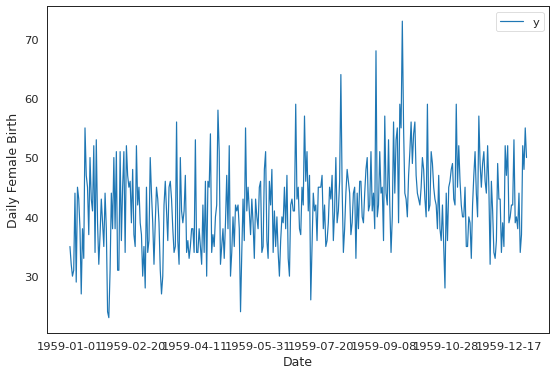

In [ ]:
ax = data.set_index('ds').plot(figsize=(9, 6))
ax.set_ylabel('Daily Female Birth')
ax.set_xlabel('Date')

In [ ]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)

In [ ]:
trainLen = 335
train = data[:trainLen]
test = data[trainLen:]

In [ ]:
my_model.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future_dates = my_model.make_future_dataframe(periods=30, freq='MS')
future_dates.tail()

,ds
360,1962-02-01
361,1962-03-01
362,1962-04-01
363,1962-05-01
364,1962-06-01


In [ ]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
360,1962-02-01,66.350995,52.705484,79.804535
361,1962-03-01,67.029171,53.332430,81.309589
362,1962-04-01,63.723469,50.547107,77.043468
363,1962-05-01,68.905144,55.676200,82.493826
364,1962-06-01,68.320322,55.088442,81.162233


In [ ]:
predicted = forecast['yhat'][335:]

In [ ]:
error = sqrt(mean_squared_error(test['y'], predicted))
print('Test RMSE: %.3f' % error)

Test RMSE: 16.813


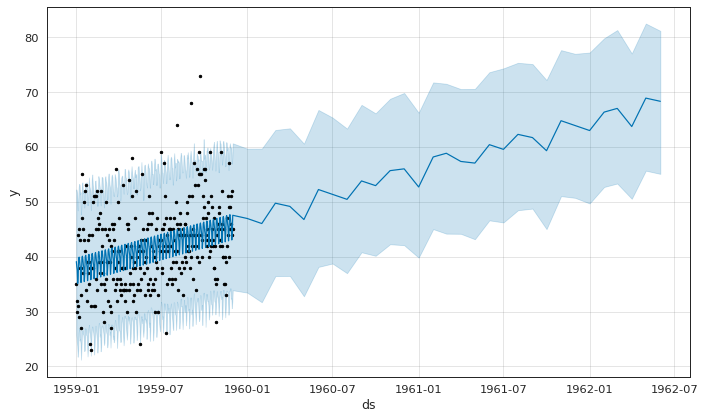

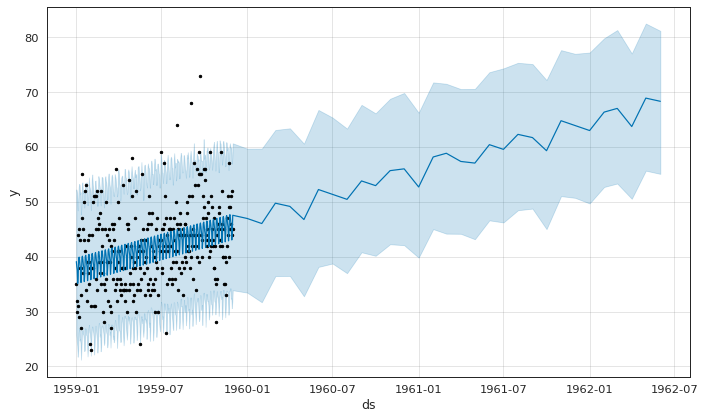

In [ ]:
my_model.plot(forecast, uncertainty=True)

q13

vanilla

In [ ]:
# https://keras.io/api/
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from numpy import array

import pandas as pd
# https://pandas.pydata.org/docs/

import numpy as np
# https://numpy.org/doc/stable/about.html

from math import sqrt
# https://docs.python.org/3/library/math.html
from datetime import datetime
# https://docs.python.org/3/library/datetime.html

from matplotlib import pyplot as plt
# https://matplotlib.org/index.html
import seaborn as sns
# https://seaborn.pydata.org/

from sklearn.metrics import mean_squared_error
# https://scikit-learn.org/stable/getting_started.html

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/nrjcs/iitpbse/master/daily-total-female-births.csv')

In [ ]:
data.head()

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [ ]:
data.dtypes

Date      object
Births     int64
dtype: object

In [ ]:
data['Date'] = pd.DatetimeIndex(data['Date'])

In [ ]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [ ]:
raw_seq = data['Births']
trainLen = 92
train = raw_seq[:trainLen]
test = raw_seq[trainLen:]

In [ ]:
# choose a number of time steps
n_steps = 10

In [ ]:
# split into samples
X, y = split_sequence(train, n_steps)

In [ ]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [ ]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
# fit model
history = model.fit(X, y, epochs=200, verbose=0)

dict_keys(['loss'])


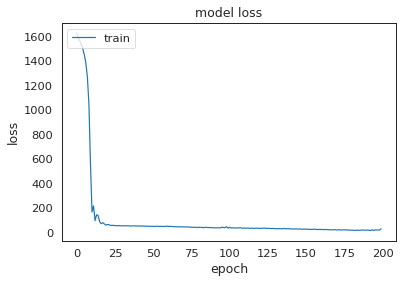

In [ ]:
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
test = test.reset_index(drop = True)

In [ ]:
# demonstrate prediction
X_test, y_test = split_sequence(test, n_steps)
X_test = np.array(X_test).reshape((-1, n_steps, n_features))
yhat = model.predict(X_test, verbose=0)

In [ ]:
error = sqrt(mean_squared_error(y_test, yhat))
print('Test RMSE: %.3f' % error)

Test RMSE: 9.185


In [ ]:
MAPE = np.mean(np.abs((y_test - yhat) / y_test)) * 100
print('MAPE %' ,MAPE)

MAPE % 17.517755580683897


Stacked LSTM

In [ ]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
# fit model
history= model.fit(X, y, epochs=200, verbose=0)

dict_keys(['loss'])


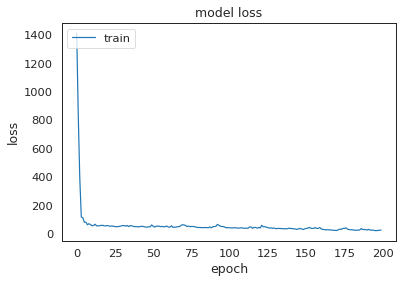

In [ ]:
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# demonstrate prediction
X_test, y_test = split_sequence(test, n_steps)
X_test = np.array(X_test).reshape((-1, n_steps, n_features))
yhat = model.predict(X_test, verbose=0)

In [ ]:
error = sqrt(mean_squared_error(y_test, yhat))
print('Test RMSE: %.3f' % error)

Test RMSE: 8.094


In [ ]:
MAPE = np.mean(np.abs((y_test - yhat) / y_test)) * 100
print('MAPE %' ,MAPE)

MAPE % 15.691339388795978


Bi-directional 

In [ ]:
from keras.layers import Bidirectional

In [ ]:
# define model
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
# fit model
history = model.fit(X, y, epochs=200, verbose=0)

dict_keys(['loss'])


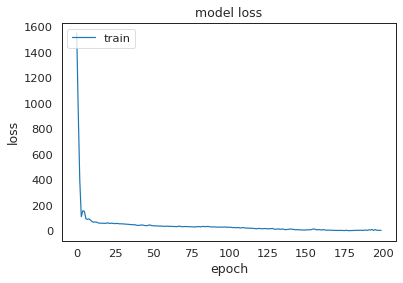

In [ ]:
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
# demonstrate prediction
X_test, y_test = split_sequence(test, n_steps)
X_test = np.array(X_test).reshape((-1, n_steps, n_features))
yhat = model.predict(X_test, verbose=0)


In [ ]:
error = sqrt(mean_squared_error(y_test, yhat))
print('Test RMSE: %.3f' % error)


Test RMSE: 9.555


In [ ]:
MAPE = np.mean(np.abs((y_test - yhat) / y_test)) * 100
print('MAPE %' ,MAPE)

MAPE % 18.754694844348048
